## Types of Machine Learning

In [2]:
## Supervised Leaning -- trained with labeled data
## Unsupervised -- with unlabeled data
## Reinforcement -- trial and error method

In [ ]:
## Unsupervised -- regression(numeric output) and Classification(categorical output)

In [3]:
## Regression models -- Linear reg, Decsion tree and SVM

In [4]:
## Classification models -- SV classfier, naive bayes, Random forest, KNN

# Supervised  Learning

## 1.Linear Regression

In [6]:
## Y = mx + c

# m  - slope - rate of change
# c - intercept

In [7]:
## varience -- less error
# Cost function = actual predicition - predicted

In [8]:
# Simple Linear regression -- one input(x) and one output(y)
# Multi Linear regression -- multiple inputs(x) and one output(y)

# Project 1 - Ice Cream prediction

In [ ]:
# load data set
# Check for null values and perform data cleaning
# check feature correlation 
# convert categorical to numeric columns
# Exytract features and label from dataset
# split thw data into train and test and feature sca;ing
# train the model usong suitable ML model
# check accuracy and perform validation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("SalesData.csv")

In [11]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [12]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [17]:
data.shape

(500, 2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [20]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [21]:
print(data.isnull().sum())

Temperature    0
Revenue        0
dtype: int64


In [22]:
data.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

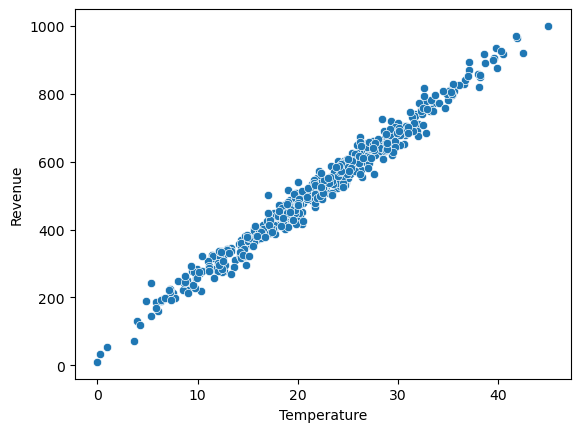

In [30]:
sns.scatterplot(data = data, x = "Temperature", y = "Revenue")

<AxesSubplot:>

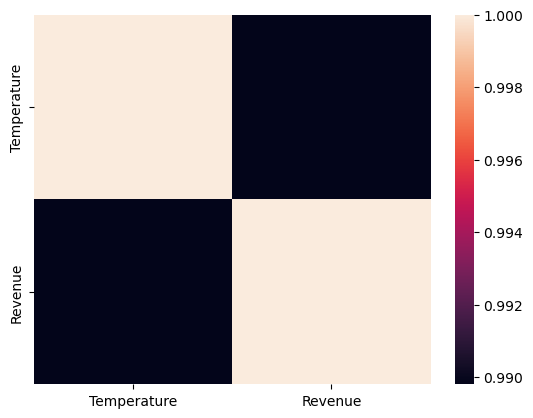

In [31]:
sns.heatmap(data.corr())

In [32]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.15, random_state= 42 )

In [36]:
xtrain.head(), xtest.head()

(     Temperature
 304    30.028207
 268    35.458136
 69     18.773532
 455    20.900575
 465    20.896619,
      Temperature
 361    29.704183
 73     27.375401
 374    23.984641
 155    21.144047
 104    26.595054)

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054


In [37]:
### Linear Linear regress model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)      

LinearRegression()

In [40]:
model.intercept_    ## intercept

46.11765332826644

In [41]:
model.coef_     ## coefficient

array([21.42793493])

In [43]:
## Prediction

# Test the model

test_result = model.predict(xtest)

In [44]:
test_result[:2]

array([682.61695445, 632.71596486])

In [45]:
ytest[:2]     ## check for the actual value

361    659.873287
73     623.248701
Name: Revenue, dtype: float64

In [46]:
## Check the accuracy tscore -- accuracy 

model.score(xtest,ytest)*100

97.65296315984313

In [47]:
## Use this model to predict the model

s = [[30]]
model.predict(s)

C:\Users\win\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([688.95570124])

# Project 2 - Insurance expense prediction (MultiLinear reg)

In [48]:
ins = pd.read_csv("insurance.csv")

In [49]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [50]:
ins.shape

(1338, 7)

In [51]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
ins.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [53]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [54]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [55]:
ins.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

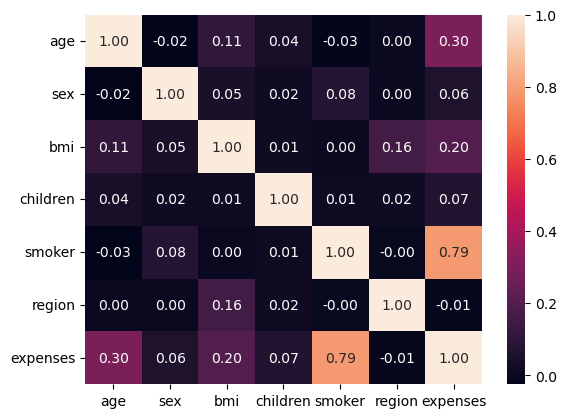

In [70]:
sns.heatmap(ins.corr(),annot=True, fmt="0.2f")

In [58]:
## eveything should be numeric for data analysis

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()  
ins["sex"] = le.fit_transform(ins["sex"])
ins["region"] = le.fit_transform(ins["region"])
ins["smoker"] = le.fit_transform(ins["smoker"])


In [57]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [62]:
X = ins.iloc[:,:-1]
Y = ins.iloc[:,-1]

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.15, random_state= 42 )

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain) 

LinearRegression()

In [65]:
test_result = model.predict(xtest)

In [66]:
test_result[:2]

array([8991.04757127, 7131.148618  ])

In [67]:
model.score(xtest,ytest)*100

79.70584482472728

# Feature Scaling

In [71]:
## Scaling the numeric value to the range -- effective in algo like KNN

## Methods of Feature Scaling


###########  Important ####################

# Standardization -- to avoid positive skewing and negative skewing and maintain uniform distribution
# Normalisation


In [74]:
### Standardisation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(xtrain)

xtrain = sc.transform(xtrain)
xtest = sc.transform(xtest)


In [75]:
xtrain

array([[ 0.90607943,  0.97824881, -0.51497503, -0.90141879,  1.97506002,
        -0.47048206],
       [-0.65721695,  0.97824881,  2.22914499,  0.74502806, -0.50631373,
         0.43465855],
       [-1.43886514,  0.97824881, -0.53130908,  0.74502806, -0.50631373,
        -0.47048206],
       ...,
       [ 1.33243299,  0.97824881, -0.87432408, -0.90141879, -0.50631373,
        -1.37562266],
       [-0.15980446, -1.02223482,  2.78450261,  0.74502806,  1.97506002,
         1.33979915],
       [ 1.11925621,  0.97824881, -0.10662384, -0.90141879, -0.50631373,
         1.33979915]])

## Normalisation (scale down  from 0 to 1)

In [76]:
data4 = pd.read_csv("SalesData.csv")

In [77]:
data4.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
##### try this with some dataset #############